# SC4003 INTELLGENT AGENTS Assignment 1
Lim Song Wei, Greg
U2120517G

In [886]:
import numpy as np
import random
import matplotlib.pyplot as plt 

In [887]:
# These functions are width and height independant

def prettyPrint(grid):
    # grid = [[grid[j][i] for j in range(6)] for i in range(6)]
    for row in grid:
        print('+----'*(len(grid[0])), end="+\n")
        print('|', end="")
        for cell in row:
            if np.isnan(cell): cellFormat = "[]"
            elif cell==1: cellFormat = "+1"
            elif cell==-1: cellFormat = "-1"
            else : cellFormat = "  "
            print(" "+cellFormat, end=" |")
    
        print()
    print('+----'*(len(grid[0])), end="+\n")

def prettyPrintUtility(grid):
    for row in grid:
        # print('+-------'*(len(grid[0])), end="+\n")
        # print('|', end="")
        for cell in row:
            if cell == 0: cellFormat = "     "
            else: cellFormat = "{:.2f}".format(cell).rjust(5)
            print(" "+cellFormat, end=" ")
            # print(" "+cellFormat, end=" |")
    
        print()
    # print('+-------'*(len(grid[0])), end="+\n")

def prettyPrintPI(PI, walls):
    # PI = [[PI[j][i] for j in range(6)] for i in range(6)]
    for i,row in enumerate(PI):
        print('+---'*(len(PI[0])), end="+\n")
        print('|', end="")
        for j,cell in enumerate(row):
            if (i,j) in walls: cellFormat = " "
            elif cell==0: cellFormat = "^"
            elif cell==1: cellFormat = ">"
            elif cell==2: cellFormat = "v"
            elif cell==3: cellFormat = "<"
            print(" "+cellFormat, end=" |")
    
        print()
    print('+---'*(len(PI[0])), end="+\n")

def makeGridReward(width, hight, plusOne, minusOne, wall):
    grid = np.zeros((hight, width))
    reward = np.full((hight, width),-0.04)
    U = grid.copy()

    for i in plusOne:
        grid[i] = 1
        reward[i] = 1
    for i in minusOne:
        grid[i] = -1
        reward[i] = -1
    for i in wall:
        grid[i[0]][i[1]] = np.nan

    return (grid,reward)

In [888]:
# function to calculate the expected Utility and the best policy for the reward matrix and current Utility

# gamma = 0.99
# value they use ~ 0.946
# gamma = 0.946

def getRelVal(x,y,U,dir,walls):
    """
    Return the expected utilily for a certain direction relertive to a cell
    if the relertive direction is a wall, return its own utility
    """
    hight = len(U)
    width = len(U[0])
    def isValid(x,y):
        if(x<0 or x>=hight): return False
        if(y<0 or y>=width): return False
        if (x,y) in walls: return False
        return True

    if dir == "^":
        # x,y = x,y-1
        return U[x-1][y] if isValid(x-1,y) else U[x][y]
    elif dir == ">":
        # x,y = x+1,y
        return U[x][y+1] if isValid(x,y+1) else U[x][y]
    elif dir == "v":
        # x,y = x,y+1
        return U[x+1][y] if isValid(x+1,y) else U[x][y]
    elif dir == "<":
        # x,y = x-1,y
        return U[x][y-1] if isValid(x,y-1) else U[x][y]


In [889]:
GAMMA = 0.99

def getRelVal(x,y,U,dir,walls):
    """
    Return the expected utilily for a certain direction relertive to a cell
    if the relertive direction is a wall, return its own utility
    """
    hight = len(U)
    width = len(U[0])
    def isValid(x,y):
        if(x<0 or x>=hight): return False
        if(y<0 or y>=width): return False
        if (x,y) in walls: return False
        return True

    if dir == "^":
        # x,y = x,y-1
        return U[x-1][y] if isValid(x-1,y) else U[x][y]
    elif dir == ">":
        # x,y = x+1,y
        return U[x][y+1] if isValid(x,y+1) else U[x][y]
    elif dir == "v":
        # x,y = x,y+1
        return U[x+1][y] if isValid(x+1,y) else U[x][y]
    elif dir == "<":
        # x,y = x-1,y
        return U[x][y-1] if isValid(x,y-1) else U[x][y]

# ============================== POLICY ITERATION ==============================
def evaluatePolicy(p, U2, reward, grid, walls):
    '''
    evaluates a given policy and return the expected U of this Policy
    '''
    hight = len(grid)
    width = len(grid[0])
    # U = np.zeros((hight, width))
    deltaChange=1

    U = U2.copy()

    # while delta > THETA:
    # for i in range(1000):
    while deltaChange>1e-5:
        for h in range(hight):
            for w in range(width):
                if (h,w) in walls: continue

                oldU = U.copy()
                
                if p[h][w] == 0: U[h][w] = reward[h][w] + GAMMA*(getRelVal(h,w,U,"<",walls)*0.1 + getRelVal(h,w,U,"^",walls)*0.8 + getRelVal(h,w,U,">",walls)*0.1)
                if p[h][w] == 1: U[h][w] = reward[h][w] + GAMMA*(getRelVal(h,w,U,"^",walls)*0.1 + getRelVal(h,w,U,">",walls)*0.8 + getRelVal(h,w,U,"v",walls)*0.1)
                if p[h][w] == 2: U[h][w] = reward[h][w] + GAMMA*(getRelVal(h,w,U,">",walls)*0.1 + getRelVal(h,w,U,"v",walls)*0.8 + getRelVal(h,w,U,"<",walls)*0.1)
                if p[h][w] == 3: U[h][w] = reward[h][w] + GAMMA*(getRelVal(h,w,U,"v",walls)*0.1 + getRelVal(h,w,U,"<",walls)*0.8 + getRelVal(h,w,U,"^",walls)*0.1)
                
                deltaChange = np.average(np.absolute(oldU - U))
                
    return U

def improvePolicy(U, reward, grid, walls):
    '''
    Returns a policy for a given U
    Note: 0 is up 1 is right 2 is down and 3 is right
    '''
    hight = len(grid)
    width = len(grid[0])
    P = np.zeros((hight, width))

    t = [0,0,0,0]

    for h in range(hight):
        for w in range(width):
            if (h,w) in walls: continue
            
            t[0] = reward[h][w] + getRelVal(h,w,U,"<",walls)*0.1 + getRelVal(h,w,U,"^",walls)*0.8 + getRelVal(h,w,U,">",walls)*0.1
            t[1] = reward[h][w] + getRelVal(h,w,U,"^",walls)*0.1 + getRelVal(h,w,U,">",walls)*0.8 + getRelVal(h,w,U,"v",walls)*0.1
            t[2] = reward[h][w] + getRelVal(h,w,U,">",walls)*0.1 + getRelVal(h,w,U,"v",walls)*0.8 + getRelVal(h,w,U,"<",walls)*0.1
            t[3] = reward[h][w] + getRelVal(h,w,U,"v",walls)*0.1 + getRelVal(h,w,U,"<",walls)*0.8 + getRelVal(h,w,U,"^",walls)*0.1

            P[h][w] = np.argmax(t)
    return P


# ============================== VALUE ITERATION ==============================
def iterateValue(U, reward, grid, walls):
    '''
    performs one step of value iteration, retruns the U after 1 step.
    '''
    hight = len(grid)
    width = len(grid[0])
    Ui = np.zeros((hight, width))

    t = [0,0,0,0]

    for h in range(hight):
        for w in range(width):
            if (h,w) in walls: 
                Ui[h][w] = 0
                continue
            t[0] = reward[h][w] + GAMMA*(getRelVal(h,w,U,"<",walls)*0.1 + getRelVal(h,w,U,"^",walls)*0.8 + getRelVal(h,w,U,">",walls)*0.1)
            t[1] = reward[h][w] + GAMMA*(getRelVal(h,w,U,"^",walls)*0.1 + getRelVal(h,w,U,">",walls)*0.8 + getRelVal(h,w,U,"v",walls)*0.1)
            t[2] = reward[h][w] + GAMMA*(getRelVal(h,w,U,">",walls)*0.1 + getRelVal(h,w,U,"v",walls)*0.8 + getRelVal(h,w,U,"<",walls)*0.1)
            t[3] = reward[h][w] + GAMMA*(getRelVal(h,w,U,"v",walls)*0.1 + getRelVal(h,w,U,"<",walls)*0.8 + getRelVal(h,w,U,"^",walls)*0.1)
            Ui[h][w] = np.max(t)
    return Ui

# Part 1

### Making the Grid

In [907]:
# Making the grid

#      Y  ->  ->  -> 
#  X  00  01  02  ..
#  v  10  11  12  ..
#  v  20  21  22  ..
#  v  ..  ..  ..  ..

WIDTH = 6
HIGHT = 6
START = (3,2)
WALLS = ((0,1), (1,4), (4,1), (4,2), (4,3),)
PLUSONE = ((0,0), (0,2), (0,5), (1,3), (2,4), (3,5),)
MINUSONE = ((1,1), (1,5), (2,2), (3,3), (4,4),)

(grid,reward) = makeGridReward(WIDTH, HIGHT, PLUSONE, MINUSONE, WALLS)

prettyPrint(grid)
# print()
# prettyPrint(reward)
# print(grid)
# print(reward)

+----+----+----+----+----+----+
| +1 | [] | +1 |    |    | +1 |
+----+----+----+----+----+----+
|    | -1 |    | +1 | [] | -1 |
+----+----+----+----+----+----+
|    |    | -1 |    | +1 |    |
+----+----+----+----+----+----+
|    |    |    | -1 |    | +1 |
+----+----+----+----+----+----+
|    | [] | [] | [] | -1 |    |
+----+----+----+----+----+----+
|    |    |    |    |    |    |
+----+----+----+----+----+----+


##### Value Iteration

1132
 100.00         95.04  93.87  92.65  93.33 
 98.39  95.88  94.54  94.40         90.92 
 96.95  95.59  93.29  93.18  93.10  91.79 
 95.55  94.45  93.23  91.11  91.81  91.89 
 94.31                       89.55  90.57 
 92.94  91.73  90.53  89.36  88.57  89.30 
+---+---+---+---+---+---+
| ^ |   | < | < | < | ^ |
+---+---+---+---+---+---+
| ^ | < | < | < |   | ^ |
+---+---+---+---+---+---+
| ^ | < | < | ^ | < | < |
+---+---+---+---+---+---+
| ^ | < | < | ^ | ^ | ^ |
+---+---+---+---+---+---+
| ^ |   |   |   | ^ | ^ |
+---+---+---+---+---+---+
| ^ | < | < | < | ^ | ^ |
+---+---+---+---+---+---+


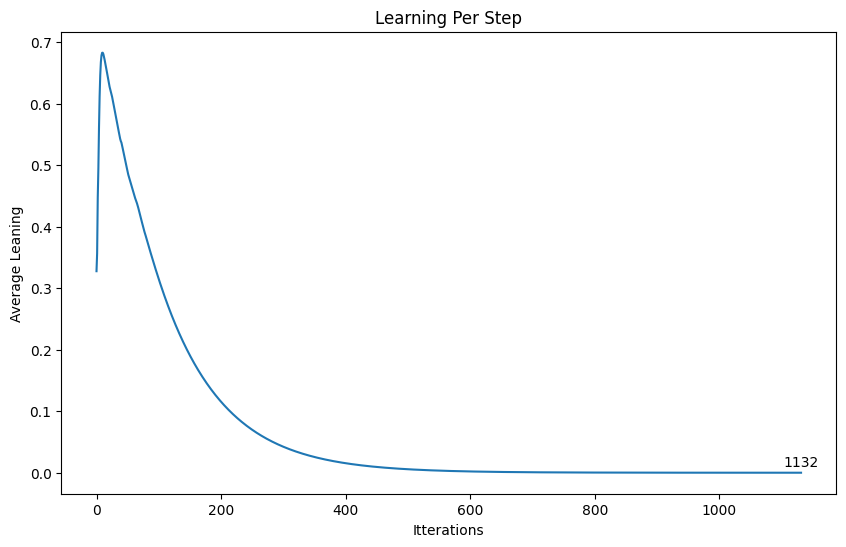

In [919]:
# ============================== VALUE ITERATION ==============================
U = np.zeros((HIGHT, WIDTH))
oldU = np.zeros((HIGHT, WIDTH))
deltaChange = 1
deltaHistory = []
allU=[]

while deltaChange >pow(10,-5): # converges when absolute sum of difference is > 10^-5
    oldU = U

    U = iterateValue(U, reward, grid, WALLS)
    deltaChange = np.average(np.absolute(oldU - U))
    deltaHistory.append(float(deltaChange))

    allU.append(U)
    tU = U.copy()
    tU[tU == 0] = np.nan

# borrow improvePolicy function to generate policy
P = improvePolicy(U, reward, grid, WALLS)
    
plt.figure(figsize=(10,6))
plt.plot(deltaHistory,)
plt.ylabel("Average Leaning")
plt.xlabel("Itterations")
plt.title("Learning Per Step")
plt.text(len(deltaHistory)-30,0.01,len(deltaHistory))

print(len(deltaHistory))
prettyPrintUtility(U)
prettyPrintPI(P, WALLS)

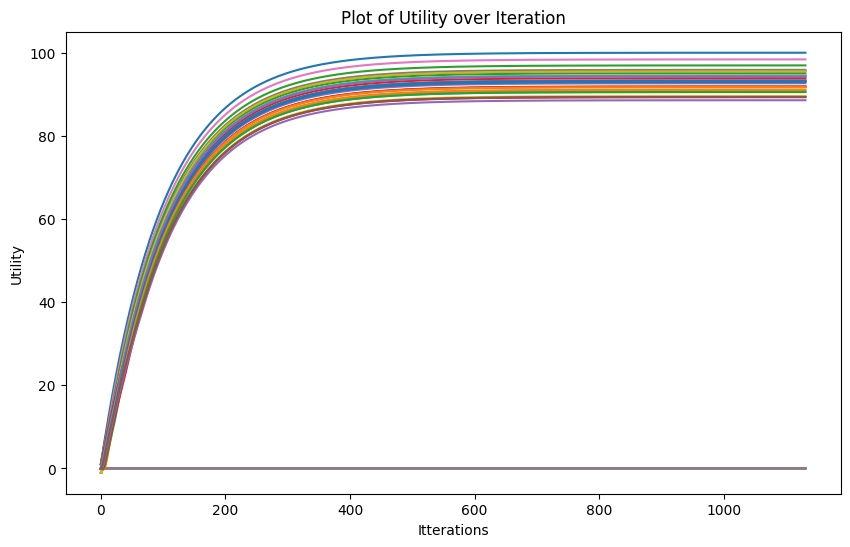

In [920]:
rotateArr = Matrix = [[[] for x in range(6)] for y in range(6)] 

for i in range(6):
    for j in range(6):
        for k in allU:
            rotateArr[i][j].append(k[i][j])

# for i in rotateArr:print(rotateArr)

plt.figure(figsize=(10,6))
plt.title("Plot of Utility over Iteration")
plt.ylabel("Utility")
plt.xlabel("Itterations")
for i in rotateArr: 
    for j in i:
        plt.plot(j)


##### Policy Iteration

5
 100.00         95.04  93.87  92.65  93.30 
 98.39  95.88  94.54  94.40         90.89 
 96.95  95.59  93.29  93.17  93.10  91.79 
 95.55  94.45  93.23  91.11  91.81  91.88 
 94.31                       89.55  90.56 
 92.94  91.73  90.53  89.36  88.57  89.29 
+---+---+---+---+---+---+
| ^ |   | < | < | < | ^ |
+---+---+---+---+---+---+
| ^ | < | < | < |   | ^ |
+---+---+---+---+---+---+
| ^ | < | < | ^ | < | < |
+---+---+---+---+---+---+
| ^ | < | < | ^ | ^ | ^ |
+---+---+---+---+---+---+
| ^ |   |   |   | ^ | ^ |
+---+---+---+---+---+---+
| ^ | < | < | < | ^ | ^ |
+---+---+---+---+---+---+


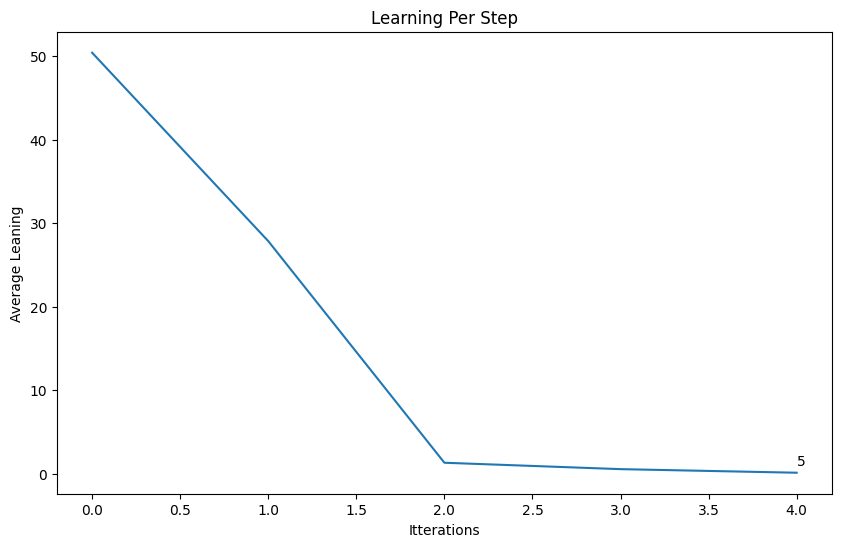

In [926]:
# ============================== POLICY ITERATION ==============================
U = np.zeros((HIGHT, WIDTH))
P = improvePolicy(U, reward, grid, WALLS)
oldU = np.zeros((HIGHT, WIDTH))
deltaChange = 1
deltaHistory = []
allU=[]

stable = False

while not stable: # converges when absolute sum of difference is > 10^-5
    oldU = U.copy()
    oldP = P.copy()

    U = evaluatePolicy(P, U, reward, grid, WALLS)
    P = improvePolicy(U, reward, grid, WALLS)

    if(np.array_equal(oldP, P)): 
        stable = True

    deltaChange = np.average(np.absolute(oldU - U))
    deltaHistory.append(float(deltaChange))

    allU.append(U)

plt.figure(figsize=(10,6))
plt.plot(deltaHistory,)
plt.ylabel("Average Leaning")
plt.xlabel("Itterations")
plt.title("Learning Per Step")
plt.text(len(deltaHistory)-1,1,len(deltaHistory))


print(len(deltaHistory))
prettyPrintUtility(U)
prettyPrintPI(P, WALLS)

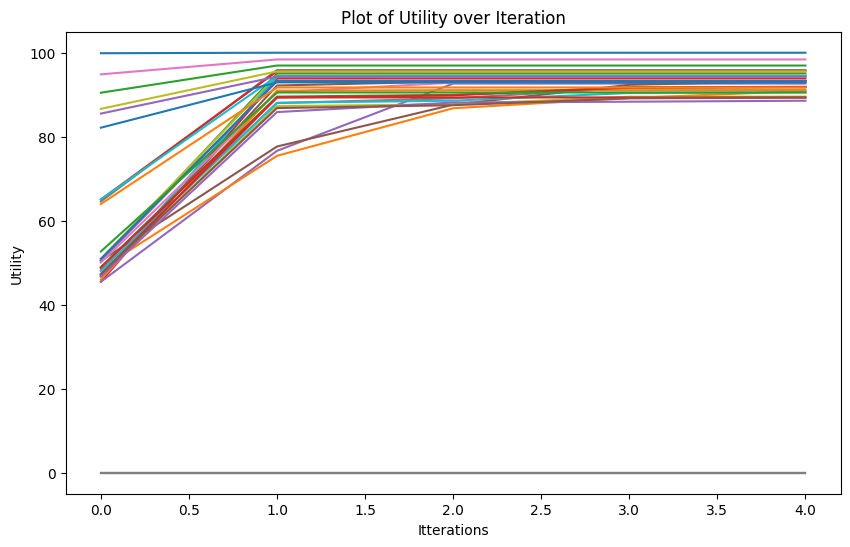

In [894]:
rotateArr = Matrix = [[[] for x in range(6)] for y in range(6)] 

for i in range(6):
    for j in range(6):
        for k in allU:
            rotateArr[i][j].append(k[i][j])

# for i in rotateArr:print(rotateArr)

plt.figure(figsize=(10,6))
plt.title("Plot of Utility over Iteration")
plt.ylabel("Utility")
plt.xlabel("Itterations")
for i in rotateArr: 
    for j in i:
        plt.plot(j)

# Part 2 - A Larger Maze

In [928]:
# Making the a bigger grid

#      Y  ->  ->  -> 
#  X  00  01  02  ..
#  v  10  11  12  ..
#  v  20  21  22  ..
#  v  ..  ..  ..  ..

TOTALWALLS = 20
TOTALPLUSONE = 20
TOTALMINUSONE = 20

random.seed("A for SC4003")

def gencoordinates(w, h):
    w=w-1
    h=h-1
    seen = set()
    x, y = random.randint(0, h), random.randint(0, w)
    while True:
        seen.add((x, y))
        yield (x, y)
        x, y = random.randint(0, h), random.randint(0, w)
        while (x, y) in seen:
            x, y = random.randint(0, h), random.randint(0, w)

WIDTH = 16
HIGHT = 12


WALLS = []
PLUSONE = []
MINUSONE = []

if (TOTALWALLS+TOTALMINUSONE+TOTALPLUSONE)*2> (WIDTH*HIGHT): 
    print("Not enought blank tiles")
else:
    g = gencoordinates(WIDTH, HIGHT)
    
    for i in range(TOTALWALLS):
        WALLS.append(next(g))
    for i in range(TOTALPLUSONE):
        PLUSONE.append(next(g))
    for i in range(TOTALMINUSONE):
        MINUSONE.append(next(g))
    
    (grid,reward) = makeGridReward(WIDTH, HIGHT, PLUSONE, MINUSONE, WALLS)

    prettyPrint(grid)
    # print()
    # prettyPrint(reward)

+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
| +1 |    |    |    |    |    |    | +1 |    |    |    |    | +1 |    |    |    |
+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
| +1 | +1 |    |    | +1 | -1 |    | -1 |    | [] |    |    |    |    |    |    |
+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|    |    |    | +1 | -1 | -1 |    |    |    |    |    |    |    | -1 |    |    |
+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
| [] | +1 |    |    | -1 |    | [] |    |    |    | +1 | +1 | [] |    | -1 |    |
+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|    | -1 |    |    |    | [] | [] |    |    |    |    |    |    |    |    | +1 |
+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|    |    |    |    |    |    |    |    | [] |    | +1 | -1 | +1 | -1 |    | [] |
+----+----+----+

1134
 99.70  98.51  97.31  96.10  95.01  93.75  92.51  92.33  90.99  89.80  88.52  87.39  87.76  86.89  87.82  88.75 
 99.67  99.39  97.90  96.58  96.23  93.61  92.27  90.15  89.84         87.58  87.58  86.86  87.81  88.97  90.04 
 98.33  98.00  96.82  96.67  94.29  92.04  91.03  89.74  88.69  87.76  88.73  88.82  87.58  88.69  90.16  91.36 
        97.85  96.46  95.28  92.97  91.79         88.48  87.74  88.68  90.02  90.16         91.03  91.26  92.71 
 93.83  95.20  95.08  94.01  92.68                87.31  87.16  88.24  89.12  90.06  91.22  92.20  93.52  94.12 
 92.74  93.82  93.74  92.76  91.55  90.23  89.06  87.84         89.43  90.12  90.14  92.45  92.52  94.85        
 91.64  92.49  92.42  91.52  90.36  89.27  89.09                90.53  90.02  90.96  92.34  93.66  96.38  96.72 
        92.43  91.25  90.31  89.28  88.97  91.46  92.96  93.15  91.78  91.03  90.28  91.42  92.57  94.90  95.40 
 89.65  90.96  90.06  89.14  88.19  87.85         95.56  94.57         92.22  90.03  90.96 

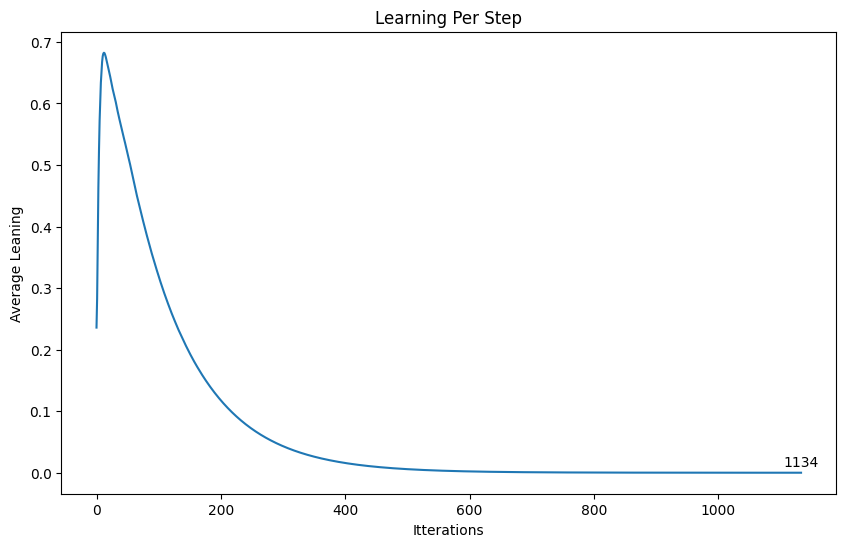

In [929]:
# ============================== VALUE ITERATION ==============================
U = np.zeros((HIGHT, WIDTH))
oldU = np.zeros((HIGHT, WIDTH))
deltaChange = 1
deltaHistory = []
allU=[]

while deltaChange >pow(10,-5): # converges when absolute sum of difference is > 10^-5
    oldU = U

    U = iterateValue(U, reward, grid, WALLS)
    deltaChange = np.average(np.absolute(oldU - U))
    deltaHistory.append(float(deltaChange))

    allU.append(U)
    tU = U.copy()
    tU[tU == 0] = np.nan

P = improvePolicy(U, reward, grid, WALLS)
    
plt.figure(figsize=(10,6))
plt.plot(deltaHistory,)
plt.ylabel("Average Leaning")
plt.xlabel("Itterations")
plt.title("Learning Per Step")
plt.text(len(deltaHistory)-30,0.01,len(deltaHistory))


print(len(deltaHistory))
prettyPrintUtility(U)
prettyPrintPI(P, WALLS)

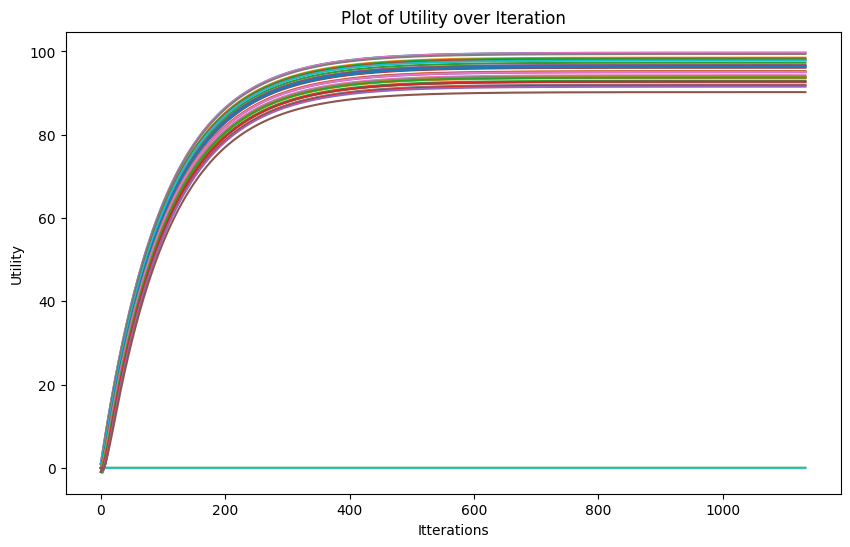

In [897]:
rotateArr = Matrix = [[[] for x in range(6)] for y in range(6)] 

for i in range(6):
    for j in range(6):
        for k in allU:
            rotateArr[i][j].append(k[i][j])

# for i in rotateArr:print(rotateArr)

plt.figure(figsize=(10,6))
plt.title("Plot of Utility over Iteration")
plt.ylabel("Utility")
plt.xlabel("Itterations")
for i in rotateArr: 
    for j in i:
        plt.plot(j)

10
 99.68  98.50  97.29  96.09  94.99  93.74  92.49  92.31  90.97  89.79  88.49  87.34  87.57  86.64  87.56  88.50 
 99.65  99.37  97.88  96.56  96.21  93.59  92.25  90.14  89.83         87.43  87.42  86.64  87.56  88.73  89.79 
 98.32  97.98  96.80  96.65  94.28  92.02  91.02  89.73  88.66  87.63  88.59  88.68  87.42  88.53  89.93  91.13 
        97.83  96.44  95.26  92.95  91.77         88.46  87.70  88.54  89.87  90.02         90.88  91.10  92.49 
 93.81  95.18  95.07  93.99  92.66                87.29  87.12  88.21  88.98  89.91  91.08  92.05  93.37  93.89 
 92.73  93.80  93.72  92.74  91.53  90.22  89.05  87.82         89.42  90.04  90.00  92.30  92.37  94.70        
 91.62  92.47  92.40  91.50  90.35  89.25  89.09                90.52  89.99  90.82  92.20  93.52  96.24  96.57 
        92.42  91.23  90.30  89.26  88.97  91.46  92.96  93.15  91.78  91.01  90.16  91.28  92.43  94.76  95.26 
 89.63  90.94  90.04  89.12  88.17  87.85         95.56  94.57         92.22  90.01  90.84  9

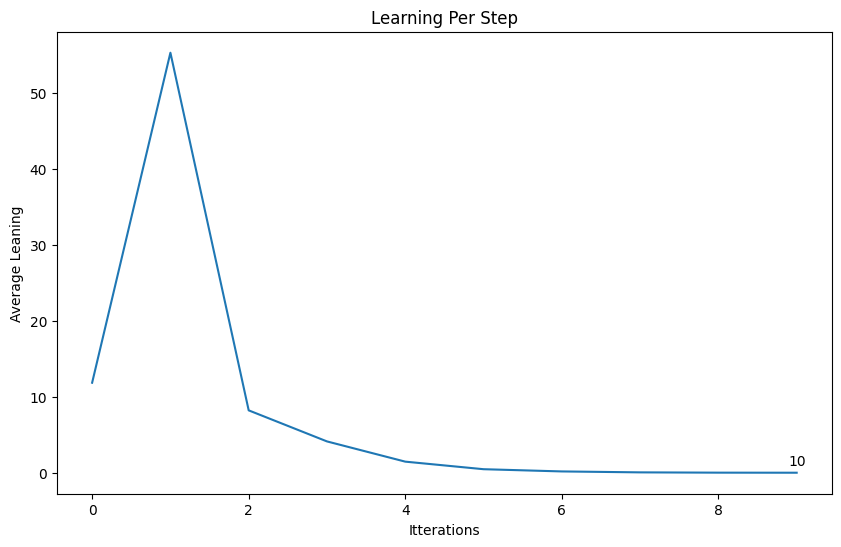

In [932]:
# ============================== POLICY ITERATION ==============================
U = np.zeros((HIGHT, WIDTH))
P = improvePolicy(U, reward, grid, WALLS)
oldU = np.zeros((HIGHT, WIDTH))
deltaChange = 1
deltaHistory = []
allU=[]

stable = False

while not stable: # converges when absolute sum of difference is > 10^-5
    oldU = U.copy()
    oldP = P.copy()

    U = evaluatePolicy(P, U, reward, grid, WALLS)
    P = improvePolicy(U, reward, grid, WALLS)

    if(np.array_equal(oldP, P)): 
        stable = True

    deltaChange = np.average(np.absolute(oldU - U))
    deltaHistory.append(float(deltaChange))

    allU.append(U)

plt.figure(figsize=(10,6))
plt.plot(deltaHistory,)
plt.ylabel("Average Leaning")
plt.xlabel("Itterations")
plt.title("Learning Per Step")
plt.text(len(deltaHistory)-1.1,1,len(deltaHistory))


print(len(deltaHistory))
prettyPrintUtility(U)
prettyPrintPI(P, WALLS)

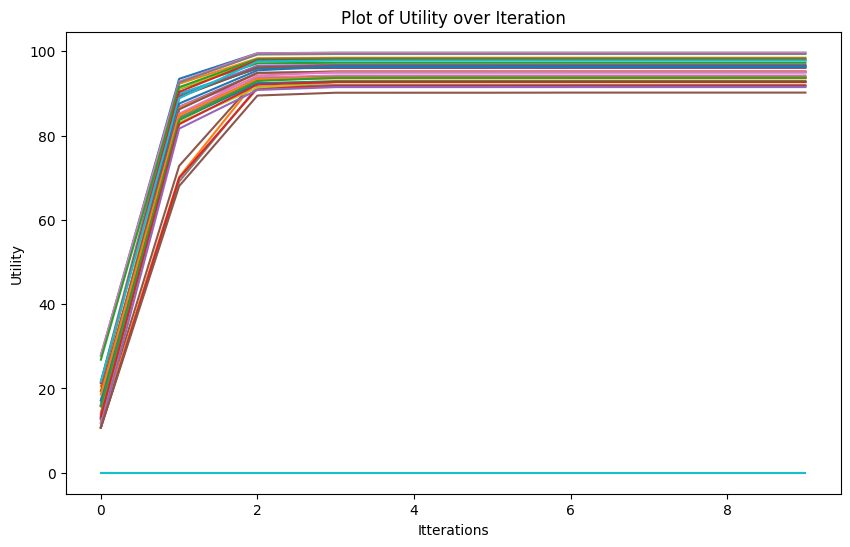

In [899]:
rotateArr = Matrix = [[[] for x in range(6)] for y in range(6)] 

for i in range(6):
    for j in range(6):
        for k in allU:
            rotateArr[i][j].append(k[i][j])

# for i in rotateArr:print(rotateArr)

plt.figure(figsize=(10,6))
plt.title("Plot of Utility over Iteration")
plt.ylabel("Utility")
plt.xlabel("Itterations")
for i in rotateArr: 
    for j in i:
        plt.plot(j)

# Part 2.2 - States, Complexity and Convergence

In [952]:
# ============================== Helper Functions ==============================
def makeGrid(width):
    def gencoordinates(w, h):
        w=w-1
        h=h-1
        seen = set()
        x, y = random.randint(0, h), random.randint(0, w)
        while True:
            seen.add((x, y))
            yield (x, y)
            x, y = random.randint(0, h), random.randint(0, w)
            while (x, y) in seen:
                x, y = random.randint(0, h), random.randint(0, w)

    WALLS = []
    PLUSONE = []
    MINUSONE = []
    
    numCells = width*width
    g = gencoordinates(width, width)
    
    for i in range(numCells//8):
        WALLS.append(next(g))
    for i in range(numCells//8):
        PLUSONE.append(next(g))
    for i in range(numCells//8):
        MINUSONE.append(next(g))
    
    (grid,reward) = makeGridReward(width, width, PLUSONE, MINUSONE, WALLS)
    return (grid, reward, WALLS)

def solveViaValueIterate(grid, reward, walls):
    hight = len(grid)
    width = len(grid[0])
    U = np.zeros((hight, width))
    oldU = np.zeros((hight, width))
    deltaChange = 1
    deltaHistory = []
    allU=[]

    while deltaChange >pow(10,-5): # converges when absolute sum of difference is > 10^-5
        oldU = U

        U = iterateValue(U, reward, grid, walls)
        deltaChange = np.average(np.absolute(oldU - U))
        deltaHistory.append(float(deltaChange))

        allU.append(U)
        tU = U.copy()
        tU[tU == 0] = np.nan

    return deltaHistory

def solveViaPolicyIterate(grid, reward, walls):
    hight = len(grid)
    width = len(grid[0])
    U = np.zeros((hight, width))
    P = improvePolicy(U, reward, grid, walls)
    oldU = np.zeros((hight, width))
    deltaChange = 1
    deltaHistory = []
    stable = False

    while not stable: # converges when absolute sum of difference is > 10^-5
        oldU = U.copy()
        oldP = P.copy()

        U = evaluatePolicy(P, U, reward, grid, walls)
        P = improvePolicy(U, reward, grid, walls)

        if(np.array_equal(oldP, P)): 
            stable = True

        deltaChange = np.average(np.absolute(oldU - U))
        deltaHistory.append(float(deltaChange))

    return deltaHistory


In [953]:
# Testing value iteration
TESTGRIDWIDTH = [6,8,10,12,14,16]
allDeltaChange = []
for i in TESTGRIDWIDTH:
    grid , reward, walls = makeGrid(i)
    deltaChange = solveViaValueIterate(grid , reward, walls)

    allDeltaChange.append(deltaChange)
    print(deltaChange)


[0.2466666666666667, 0.27455999999999997, 0.306174, 0.3302753124, 0.3823935265517401, 0.4105192078078443, 0.42648923263711447, 0.4540643129433862, 0.44600409859983337, 0.4581540679272146, 0.45856455151106995, 0.47147391297113334, 0.47455508371892346, 0.4847768529493932, 0.48921006026623876, 0.4925694139363783, 0.4930824251042829, 0.49189180844926716, 0.48929801933501577, 0.48585070491839943, 0.48185306156415986, 0.477540500564871, 0.47305753518017873, 0.4684932657413804, 0.4639024960236216, 0.45931594948619353, 0.454752082557573, 0.4502206798046149, 0.4457273806982549, 0.4412749681276546, 0.4368648862711345, 0.43249768555335605, 0.4281734994980335, 0.4238921922648202, 0.4196535031061455, 0.4154570936956799, 0.41130259093958854, 0.40718960177255165, 0.40311772565958315, 0.399086559119464, 0.39509569932577804, 0.3911447454519846, 0.3872332996833134, 0.3833609675932585, 0.3795273584069878, 0.3757320850862398, 0.37197476437748356, 0.3682550168101206, 0.36457246668323645, 0.3609267420385655

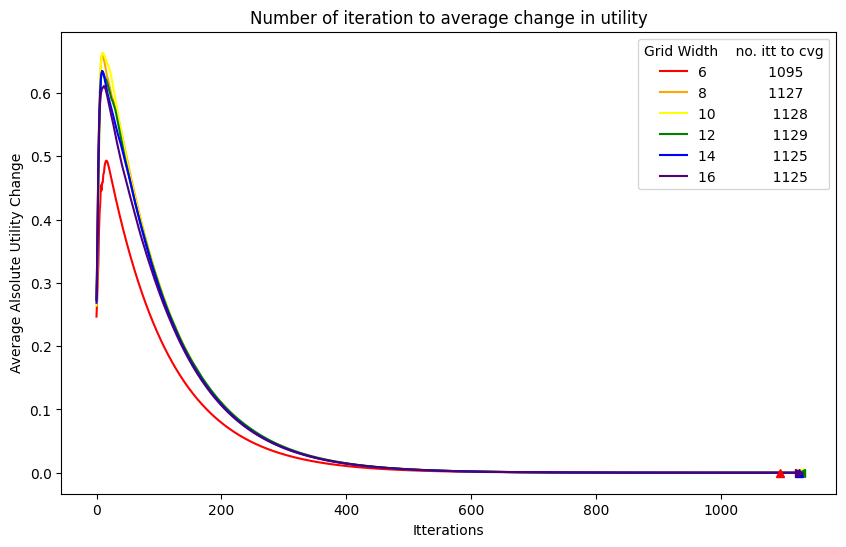

In [954]:

color = ["red", "orange", "yellow", "green", "blue", "indigo", "violet", "black", "red", "orange", "yellow", "green", "blue", "indigo", "violet", "black"]
marker = ["^",">","v", "<","^",">","v", "<","^",">","v", "<",]

legendWithConvergence = TESTGRIDWIDTH.copy()

plt.figure(figsize=(10,6))
for idx,i in enumerate(allDeltaChange):
    legendWithConvergence[idx]=str(legendWithConvergence[idx]).ljust(15," ")+str(len(i))
    plt.plot(i, label=i, color=color[idx])
for idx,i in enumerate(allDeltaChange):
    plt.plot(len(i),0, color=color[idx], marker = marker[idx])

# plt.figure(figsize=(20,50))
plt.title("Number of iteration to average change in utility")
plt.ylabel("Average Alsolute Utility Change")
plt.xlabel("Itterations")
plt.legend(legendWithConvergence, title="Grid Width    no. itt to cvg")
plt.show()

In [955]:
# Testing value iteration
# EXPENSIVE CELL
TESTGRIDWIDTH = [6,8,10,12,14,16,20,24,28,32]
allDeltaChange = []
for i in TESTGRIDWIDTH:
    grid , reward, walls = makeGrid(i)
    deltaChange = solveViaPolicyIterate(grid , reward, walls)

    allDeltaChange.append(deltaChange)
    print(deltaChange)


[4.752605767404801, 28.05833725706761, 36.64920344628248, 0.5816873731041201, 0.22535824962976114, 0.018797583360032948]
[2.6407863729716476, 62.909253253328544, 6.956485210461404, 1.9009776511675105, 2.8906843619777227, 0.6596702472276985, 0.34384718268734726, 0.09570761034528674, 0.13192244379892948, 0.01949216854005975]
[28.763009424494356, 69.11960011683567, 1.233419601488011, 0.749264451160342, 0.5733931222363627, 0.4923822516258478, 0.47931322002051935, 0.3683124865455109, 0.26747183595889534, 0.17898886664579888]
[4.93721230997149, 54.2860660193103, 16.358535732850285, 1.3146125011852083, 0.2068023857759325, 0.10314439756560488, 0.001475875022840868]
[6.4281330848342435, 57.965778205197964, 13.811901529539115, 2.6492805634914602, 1.2131710349899845, 0.6003292580130334, 0.9401282613227328, 0.9022762158833856, 0.06363328622996048, 0.025894662336816823, 0.0012932822532547435]
[4.723483409721929, 55.44816777457178, 10.45663255449491, 4.319087963715204, 0.31271050621630986, 0.2768235

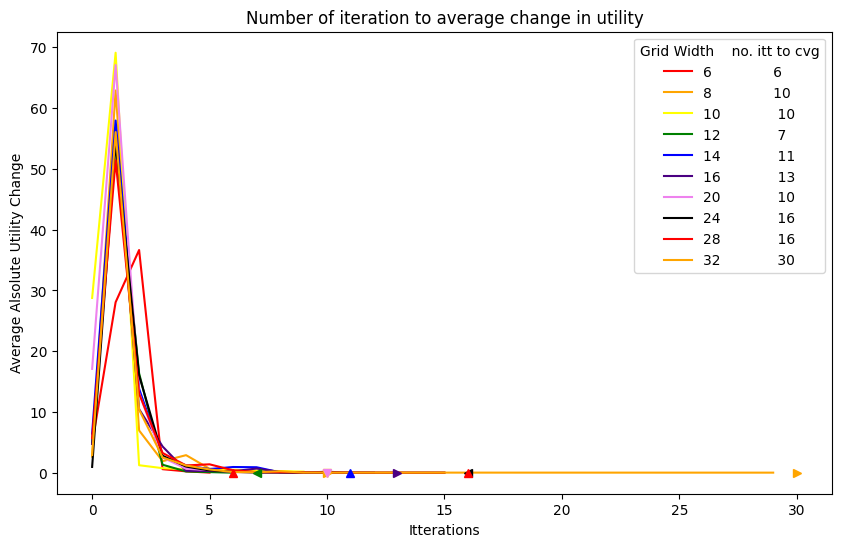

In [956]:

color = ["red", "orange", "yellow", "green", "blue", "indigo", "violet", "black", "red", "orange", "yellow", "green", "blue", "indigo", "violet", "black"]
marker = ["^",">","v", "<","^",">","v", "<","^",">","v", "<",]

legendWithConvergence = TESTGRIDWIDTH.copy()

plt.figure(figsize=(10,6))
for idx,i in enumerate(allDeltaChange):
    legendWithConvergence[idx]=str(legendWithConvergence[idx]).ljust(15," ")+str(len(i))
    plt.plot(i, label=i, color=color[idx])
for idx,i in enumerate(allDeltaChange):
    plt.plot(len(i),0, color=color[idx], marker = marker[idx])

# plt.figure(figsize=(20,50))
plt.title("Number of iteration to average change in utility")
plt.ylabel("Average Alsolute Utility Change")
plt.xlabel("Itterations")
plt.legend(legendWithConvergence, title="Grid Width    no. itt to cvg")
plt.show()

Text(0.5, 0, 'Gird Width')

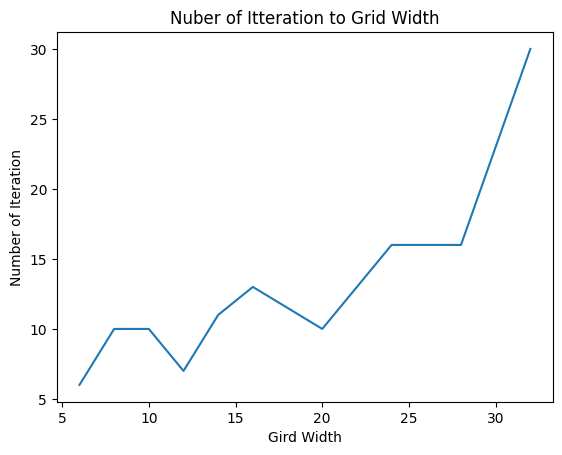

In [957]:
allLength = []
for i in allDeltaChange:
    allLength.append(len(i))

plt.plot(TESTGRIDWIDTH,allLength)
plt.title("Nuber of Itteration to Grid Width")
plt.ylabel("Number of Iteration")
plt.xlabel("Gird Width")